In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# results summary for the validation period
val = np.load("../results/summary_validation.npy", allow_pickle=True).item()

In [3]:
selected_basins = ['02055100', '02143000',
                   '12143600', '11381500',
                   '03500000', '14306500'
                  ]

In [4]:
# The idea is to plot
# observed and simulated runoff time series
# for a particular period showing 
# two calibration options:
# 1. When model was calibrated on the full calibration period (1996--2009, 14 years)
# 2. --//-- was calibrated using the single year of data (nearest to an average NSE)

# Helper for getting the required data
def get_data(basin, model):
    
    fp_shortcut = '1996_2009'
    
    fp_nse = val[basin][model][14]['NSE'][fp_shortcut]
    fp_nse = np.round(fp_nse, 2)
    
    if model == "GR4H":
        fp_data = pd.read_pickle(f"../results/experiment_results/{basin}/{model}/validation_{fp_shortcut}.pkl")
    else:
        fp_data = pd.read_pickle(f"../results/experiment_results/{basin}/{model}/validation_{fp_shortcut}_20_4320.pkl")
    
    
    sy_dict = val[basin][model][1]['NSE']
    sy_dict_values = np.array(list(sy_dict.values()))
    
    sy_shortcut = list(sy_dict.keys())[np.argmin(np.abs(sy_dict_values - sy_dict_values.mean()))]
    
    sy_nse = val[basin][model][1]['NSE'][sy_shortcut]
    sy_nse = np.round(sy_nse, 2)
    
    if model == "GR4H":
        sy_data = pd.read_pickle(f"../results/experiment_results/{basin}/{model}/validation_{sy_shortcut}.pkl")
    else:
        sy_data = pd.read_pickle(f"../results/experiment_results/{basin}/{model}/validation_{sy_shortcut}_20_4320.pkl")
       
    return fp_data, sy_data, fp_nse, sy_nse, sy_shortcut.split("_")[1]

# Plotting function
def plot_hydrographs(ax, basin, model, start=2019, end=2019, plot_title=False):
    
    fp_data, sy_data, fp_nse, sy_nse, sy_year = get_data(basin, model)
    
    color_dict = {"LSTM": "navy", "GRU": "firebrick", "GR4H": "black"}
    
    fp_data["Qobs"][str(start):str(end)].plot(ax=ax, 
                                              label="Observation", 
                                              color="tab:green", 
                                              zorder=0)
    
    fp_data["Qsim"][str(start):str(end)].plot(ax=ax, 
                                              label=f'{model}, full period ({fp_nse})', 
                                              color=color_dict[model], 
                                              alpha=1,
                                              zorder=1)
    
    sy_data["Qsim"][str(start):str(end)].plot(ax=ax, 
                                              label=f'{model}, single year ({sy_nse})', 
                                              color=color_dict[model], 
                                              alpha=0.5,
                                              zorder=2)
    
    ax.set_ylabel("Runoff, mm/hour")
    ax.set_ylim(0, 1.5*fp_data["Qobs"][str(start):str(end)].max())
    
    if plot_title:
        ax.set_title(f"{basin}")
    
    ax.legend()
    ax.grid(linestyle="--", alpha=0.5)

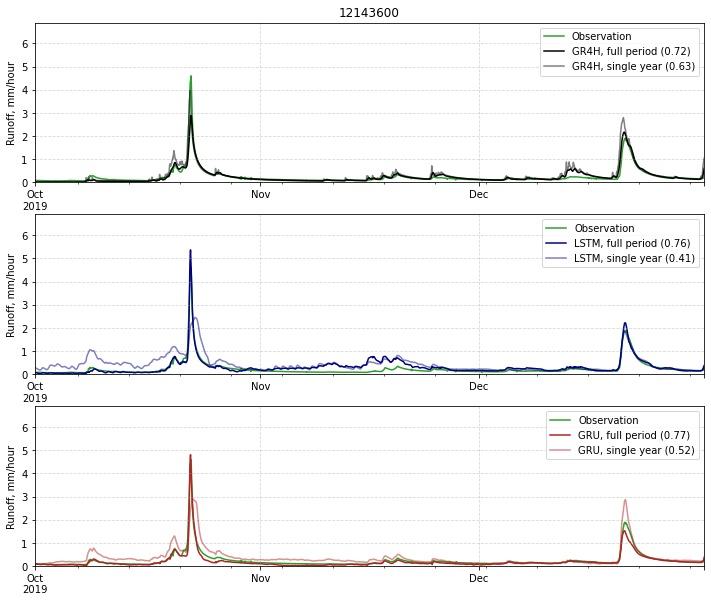

In [5]:
# Example
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

basin_to_plot = '12143600'
srt = "2019-10-01" # the first date of the period (in "YYYY-MM-DD" format)
end = "2019-12-31" # the last  date of the period (in "YYYY-MM-DD" format)

plot_hydrographs(axes[0], basin_to_plot, "GR4H", srt, end, plot_title=True)
plot_hydrographs(axes[1], basin_to_plot, "LSTM", srt, end)
plot_hydrographs(axes[2], basin_to_plot, "GRU" , srt, end)